# Anwendung der linearen Regression: Datenlücken Bereinigen

**Lernziele**<br>

 - Verständnis der statsmodels api zur Durchführung der Regression
 - sicheres Anwenden der api und inhaltliche Interpretation der Regression
 - sichere Durchführung statistischer Tests und Beurteilung der Modellgüte  

**Aufbau und Schätzung eines linearen Modell (30 min)**
Aufgabe: 
1) Erstellen Sie ein Modell mit der `statsmodels api`, um den Zusammenhang zwischen deutschem und Schweizer Strompreis abzubilden. Nutzen Sie hierzu die visuellen Informationen des Plots
2) Interpretieren Sie den Zusammenhang in Form der Koeffizienten. Was bedeutet dies für den Vergleich von schweizer und deutschen Strompreisen 
3) Wie stabil ist die Schätzung? Betrachten Sie die Standardabweichung der Parameter und deren p-Wert. 
4) Welche Spannweite 25-75% Quantil besitzt die Prognose der Werte 
5) Welche Hypothese könnte in diesem Zusammenhang neben b = 0 sinnvoll sein zu analysieren?
6) Wie beurteilen Sie die Qualität der Regression? Welche Kennzahlen betrachten Sie hierzu?
7) Warum könnte die Aufnahme weiterer Länder in die Regression sinnvoll sein?

## Vorbereitung

**Pakete einladen**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
import statsmodels.api as sm
from scipy import stats
%matplotlib widget

pd.set_option('display.precision',2)
np.set_printoptions(precision=3)
plt.close()

**Daten laden**

In [3]:
data = pd.read_excel('../data/CHDE.xlsx',header=0, parse_dates=[0],index_col=0)

**Beschreibung der Daten**

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,94113.0,2015.88,0.78,2015.00,2015.00,2016.00,2017.00,2017.00
CH,27584.0,34.51,18.61,-160.23,24.69,33.41,42.00,500.00
DE,94113.0,31.42,17.78,-241.83,22.63,31.27,40.09,329.81


**Darstellung der Daten**

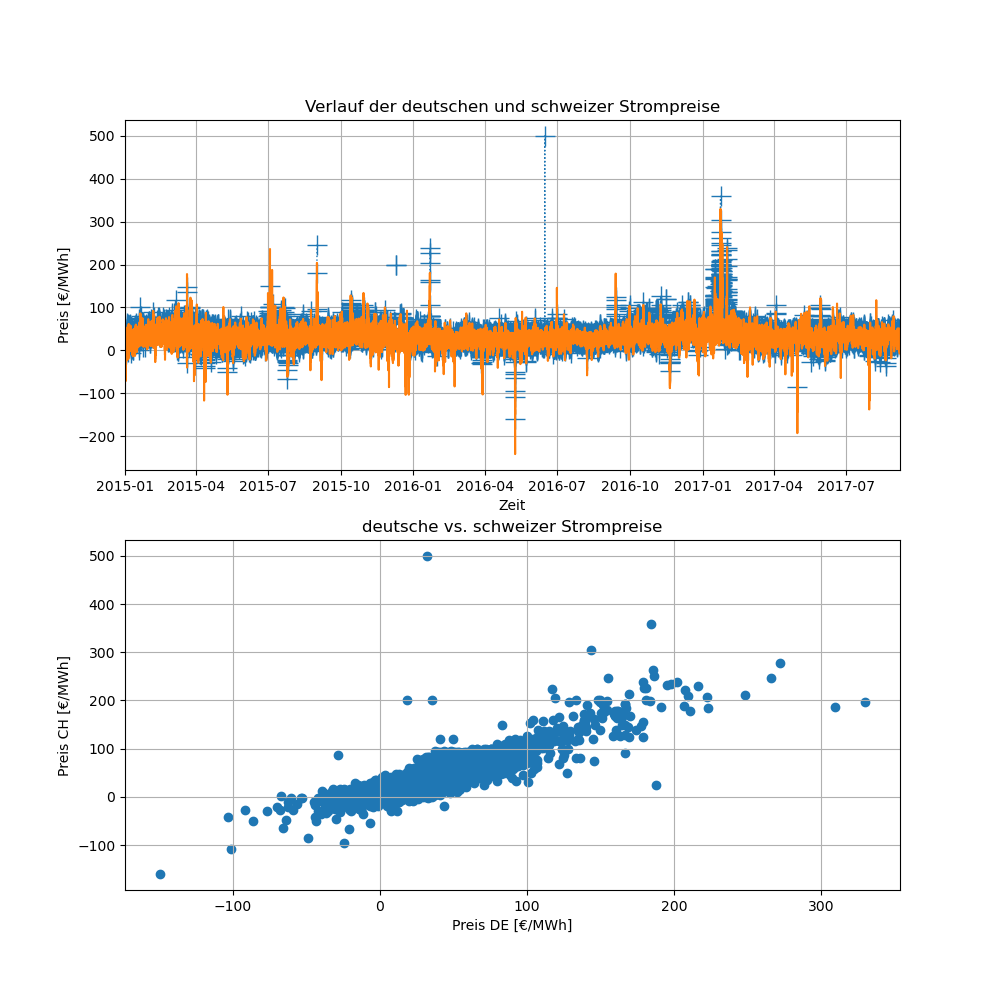

In [17]:
# Abbildung im Zeitablauf
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
lin=ax[0].plot(data.iloc[:,1:])
ax[0].set(xlabel='Zeit', ylabel='Preis [€/MWh]',title = "Verlauf der deutschen und schweizer Strompreise",xlim = (data.index.min(),data.index.max()))
lin[0].set(marker='+', linestyle = 'dotted',linewidth=1,markersize=14)
ax[0].axes.grid()
# Scatter
ax[1].scatter(data.iloc[:,2],data.iloc[:,1])
ax[1].axes.grid()
ax[1].set(xlabel='Preis DE [€/MWh]', ylabel='Preis CH [€/MWh]',title = "deutsche vs. schweizer Strompreise");

<img src="https://statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" width="200px" />

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

The main statsmodels API is split into models:

 -   statsmodels.api: `Cross-sectional models and methods`. Canonically imported using import statsmodels.api as sm.

 -   statsmodels.tsa.api: `Time-series models and methods`. Canonically imported using import statsmodels.tsa.api as tsa.

 -   statsmodels.formula.api: A convenience interface for specifying models using formula strings and DataFrames. This API directly exposes the from_formula class method of models that support the formula API. Canonically imported using import statsmodels.formula.api as smf


**relevante Klasse**<br>
In dieser Veranstaltung arbeiten wir überwiegend mit den Modellen zur linearen Regression<br>
class statsmodels.regression.linear_model.**OLS**(endog, exog=None, missing='none', hasconst=None, **kwargs)

**relevante Methode**
- fit([method, cov_type, cov_kwds, use_t])            Full fit of the model. -> regressionresults

**relevanter Output**<br>
results: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults<br>

- Methoden in nresults : results.get_prediction()
```python
results.get_prediction(
    exog=None,
    transform=True,
    weights=None,
    row_labels=None,
    **kwargs,
)
```
The prediction results `instance` contains prediction and **prediction
    variance** and can on demand calculate **confidence intervals** and summary
    tables for the **prediction of the mean** and of new observations.

## Durchführung Regression

1. Erstellen Sie ein Modell mit der statsmodels api, um den Zusammenhang zwischen deutschem und Schweizer Strompreis abzubilden. Nutzen Sie hierzu die visuellen Informationen des Plots
2. Interpretieren Sie den Zusammenhang in Form der Koeffizienten. Was bedeutet dies für den Vergleich von schweizer und deutschen Strompreisen (results.summary())
3. Wie stabil ist die Schätzung? Betrachten Sie die Standardabweichung der Parameter und deren p-Wert. 

**Vorbereitung der Daten**

In [6]:
zeignotnan = data["CH"].notna()                           # für die Regression dürfen nur die Zeitpunkte mit kompletten Daten herangezogen werden
y=data[zeignotnan]["CH"].to_numpy()[:,np.newaxis]         # Regressand  = schweizer Strompreise
x=data[zeignotnan]["DE"].to_numpy()[:,np.newaxis]         # Regressor   = deutsche Strompreise
x = sm.add_constant(x)                                    # Konstanter Term wird dem Regressionsmodell hinzugefügt

**Anwendung der fit-Methode und Darstellung der Ergebnisse**

In [7]:
# Ergebnisobjekt
results = sm.OLS(y, x).fit()
#Ausgabe der Parametrierung
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 9.993e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:28:44   Log-Likelihood:                -98669.
No. Observations:               27584   AIC:                         1.973e+05
Df Residuals:                   27582   BIC:                         1.974e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9076      0.110     35.540      0.0

**Verlauf von Regression und Orginaldaten**

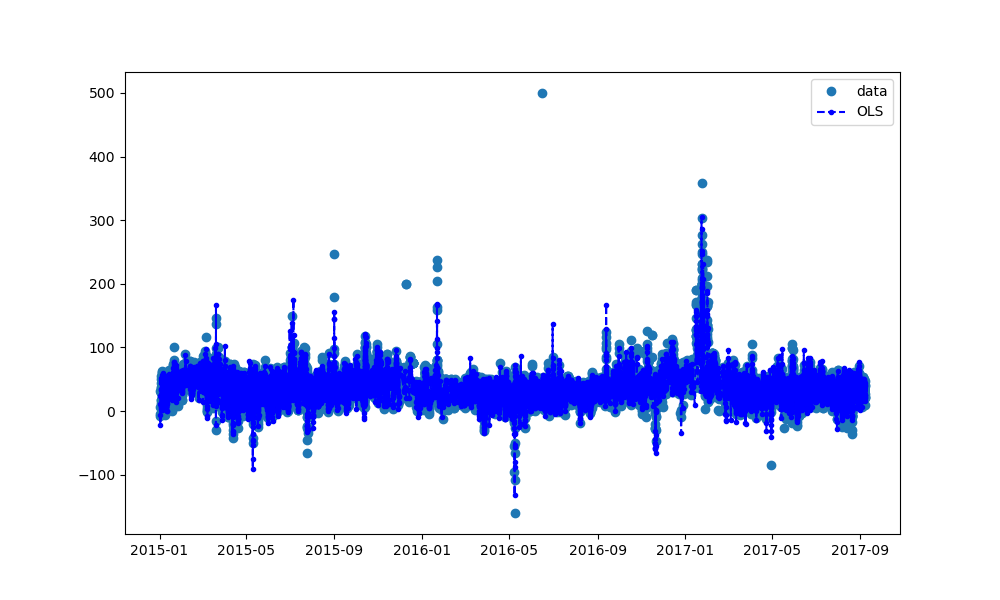

In [8]:
fig, ax = plt.subplots()
ax.plot(data[zeignotnan].index,y, "o", label="data")                               # Orginaldaten
ax.plot(data[zeignotnan].index,results.fittedvalues, "b--.", label="OLS")          # Regression
ax.legend();

## Beurteilung der Güte der Regression

**Prognosespannweite**<br>
4) Welche Spannweite 25-75% Quantil besitzt die Prognose der Werte? Wie liegt dies zu den tatsächlichen Werten; was würden Sie eigentlich erwarten?

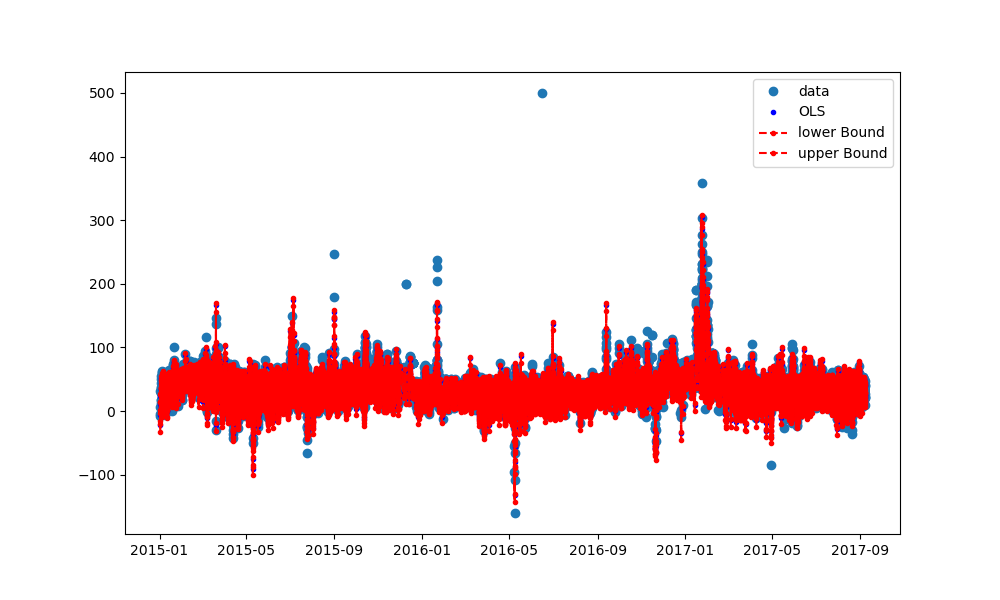

In [9]:
# Ausgabe 
pred_ols = results.get_prediction(x)
iv_l = pred_ols.summary_frame(0.25)["obs_ci_lower"]      # 25% Quantil der Prognose
iv_u = pred_ols.summary_frame(0.75)["obs_ci_upper"]      # 75% Quantil der Prognose
fig, ax = plt.subplots()
ax.plot(data[zeignotnan].index,y, "o", label="data")                               # Orginaldaten
ax.plot(data[zeignotnan].index,results.fittedvalues, "b.", label="OLS")          # Regression
ax.plot(data[zeignotnan].index,iv_l, "r--.", label="lower Bound")                  # 25% Quantil der Prognose
ax.plot(data[zeignotnan].index,iv_u, "r--.", label="upper Bound")                  # 75% Quantil der Prognose
ax.legend();

**Durchführung "allgemeiner" t-Test zur Beurteilung der Parameter**

5) Welche Hypothese könnte in diesem Zusammenhang neben b = 0 sinnvoll sein zu analysieren?

Allgemeine form des Hypothesentests

$H_0 = r_1b_1+r_2b2+...+r_nb_n =q$ 

mit:
- q Wert entsprechend H0-Hypothese
- r Vektor zur Linearkombination der Parameter
- b geschätzte Parameter des Regressionsmodells

Bis dato kennen Sie den Test in folgender Spezialform für jeden Parameter:

$H_0(b_j):\sum_{i=1}^{n} r_ib_i == 0 $ mit $r_i=1$ für i=j, sonst 0 -> $H_0(b_j): b_j == 0 $

In [10]:
# Beispiel mit Test Steigungsparameter = 0 
r = np.zeros_like(results.params)   # Initialisierung des !Vektors! r mit Null
r[1] = 1                            # die im Test beteiligten Parameter werden auf 1 gestellt (bei anderen H0-Hypothesen kann r auch anders gewählt werden)
results.t_test(r)                   # Testdurchführung und Ergebnis 

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9133      0.003    316.112      0.000       0.908       0.919

6) Wie beurteilen Sie die Qualität der Regression? Welche Kennzahlen betrachten Sie hierzu?

**graphische Analyse des Fits**

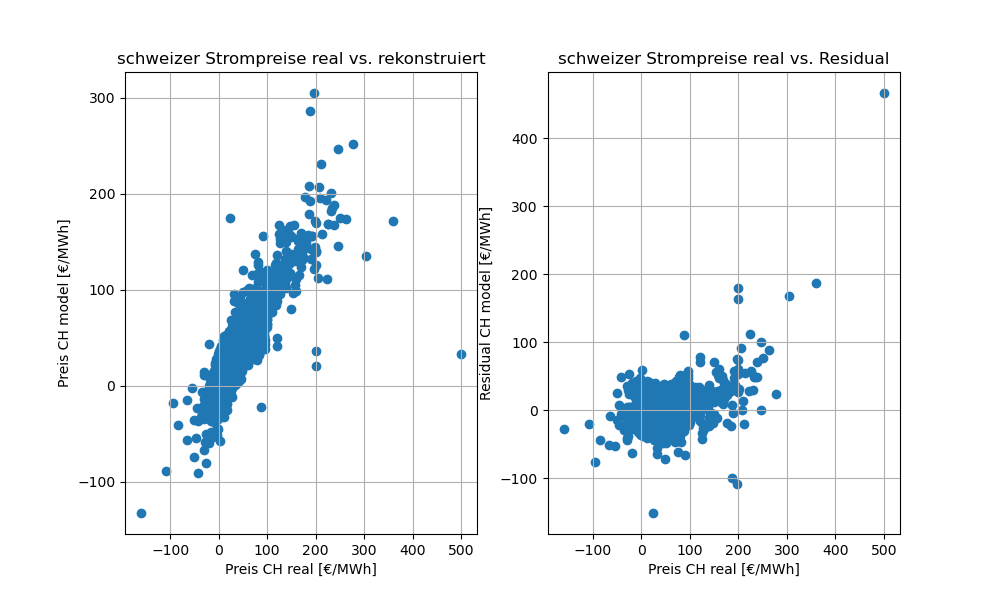

In [11]:
# Scatter Rekonstruktion vs. Real
fig, ax = plt.subplots(1,2)
ax[0].scatter(y,results.fittedvalues)
ax[0].axes.grid()
ax[0].set(xlabel='Preis CH real [€/MWh]', ylabel='Preis CH model [€/MWh]',title = "schweizer Strompreise real vs. rekonstruiert")

# Residuen über y
ax[1].scatter(y,results.resid)
ax[1].axes.grid()
ax[1].set(xlabel='Preis CH real [€/MWh]', ylabel='Residual CH model [€/MWh]',title = "schweizer Strompreise real vs. Residual");

**Normalverteilungsannahme**

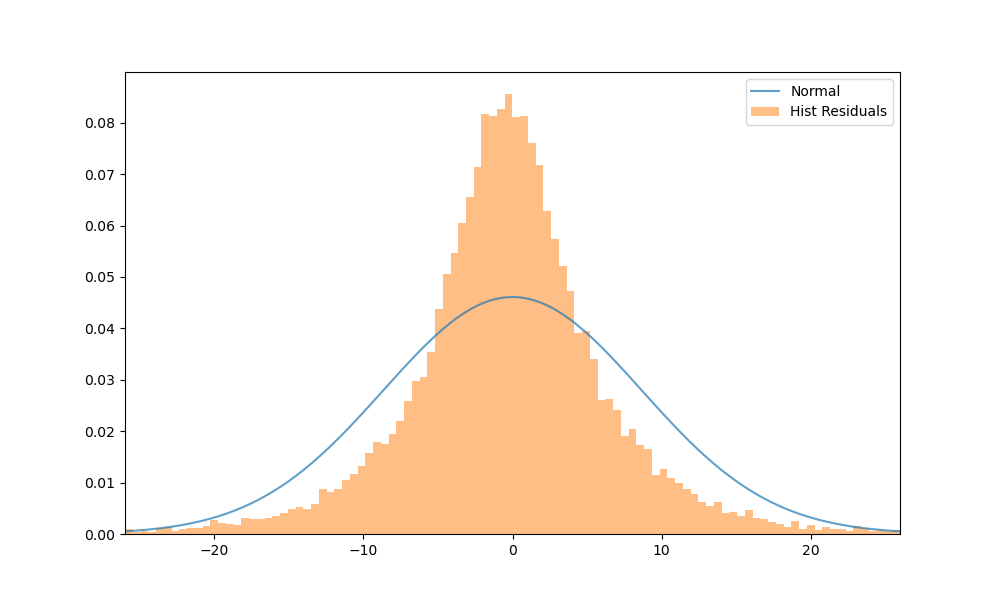

In [12]:
fig, ax = plt.subplots()
xx = np.linspace(results.resid.mean()-3*results.resid.std(),results.resid.mean()+3*results.resid.std(),200)
#y = stats.norm.pdf(x, args, kwds)
ax.plot(xx, stats.norm.pdf(xx,loc=results.resid.mean(), scale=results.resid.std()),alpha=.7)
ax.set(xlim=[results.resid.mean()-3*results.resid.std(),results.resid.mean()+3*results.resid.std()])
ax.hist(results.resid[np.abs(results.resid-results.resid.mean())<3*results.resid.std()], bins=100, alpha=0.5,density=True)
plt.legend(["Normal","Hist Residuals"]);

In [13]:
# Jarque Bera Test
class out:
    pass
jb= out()
ax.axes.grid()
ax.set(xlabel='Preis CH real [€/MWh]', ylabel='Residuum [€/MWh]',title = "schweizer Strompreise real vs. Residuum")

# Untersuchung Normalverteilung
jb.teststat,jb.pv,jb.skew,jb.kurt=sm.stats.stattools.jarque_bera(results.resid)

**Autokorrelation**

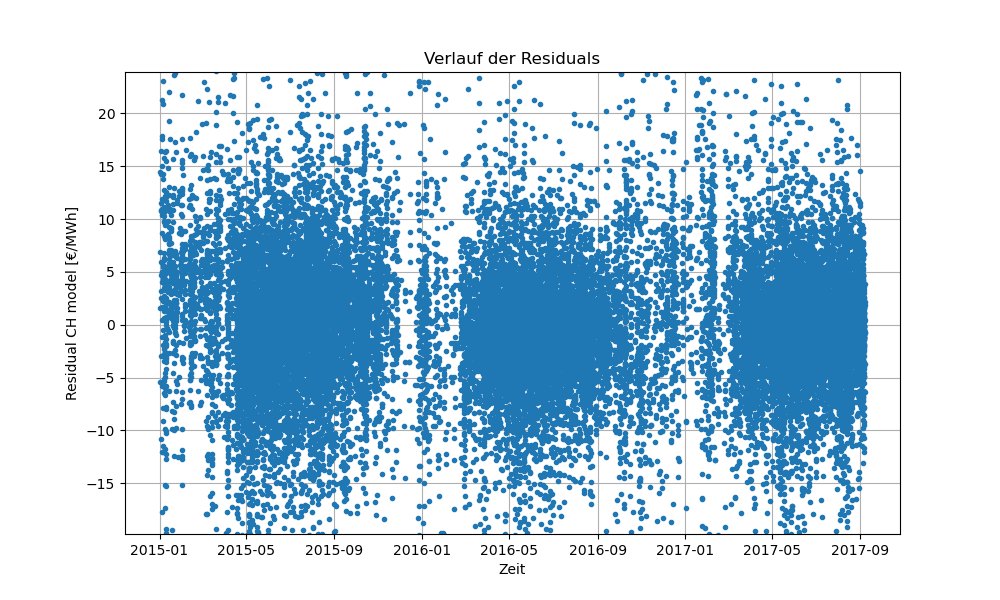

In [14]:
# Verlauf der Residuen im Zeitablauf
fig, ax = plt.subplots()
ax.plot(data[zeignotnan].index,results.resid,marker = '.',ls = "None")
ax.set(xlabel='Zeit', ylabel='Residual CH model [€/MWh]',title = "Verlauf der Residuals",ylim=[np.quantile(results.resid,.01), np.quantile(results.resid,.99)])
ax.axes.grid()

C:\Users\rs3753e\Anaconda3\envs\tf_gpu\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


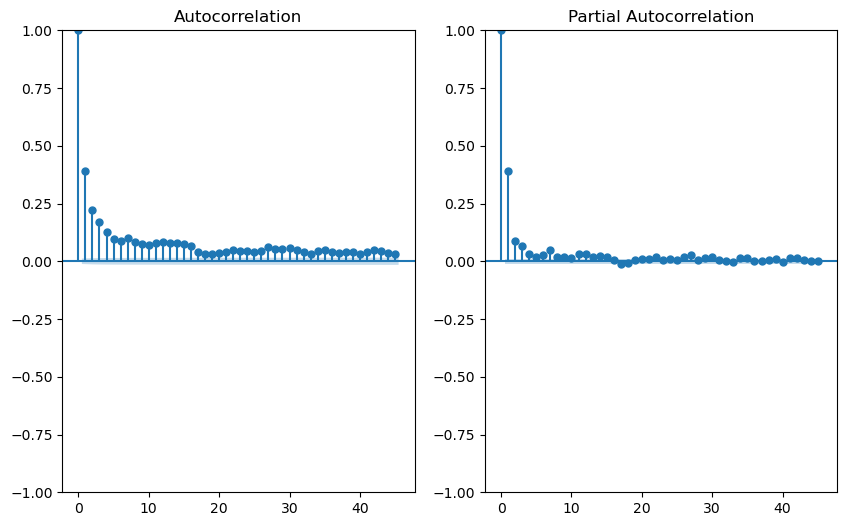

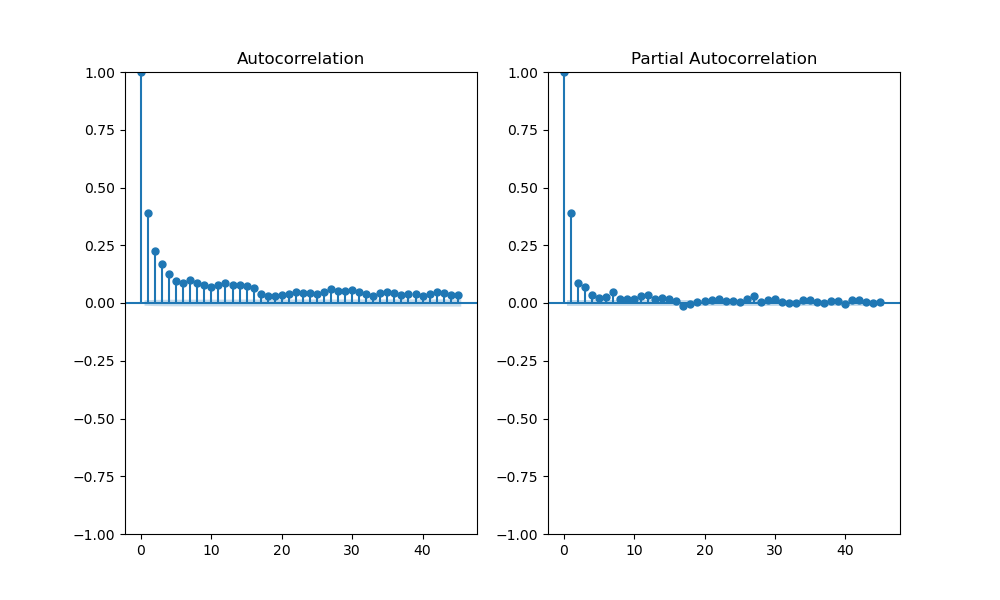

In [20]:
# visuelle Untersuchung der Korrelation
fig, ax = plt.subplots(1, 2)
sm.graphics.tsa.plot_acf(results.resid,ax=ax[0])
sm.graphics.tsa.plot_pacf(results.resid,ax=ax[1])

<img src= "../img/LBQ-Test.png" width ="500">

In [16]:
# Ljung-Box Q-Test
# H0 : keine Korrelation (p-value = Irrtumswahrscheinlichkeit bei Ablehnung von H0)  
#statsmodels.stats.diagnostic.acorr_ljungbox(x, lags=None, boxpierce=False, model_df=0, period=None, return_df=True, auto_lag=False)
lb=sm.stats.diagnostic.acorr_ljungbox(results.resid, lags=None, boxpierce=False, model_df=0, period=None, return_df=True, auto_lag=True)
lb

,lb_stat,lb_pvalue
1,4167.88,0.0
2,5551.91,0.0
3,6345.65,0.0
4,6792.18,0.0
5,7048.44,0.0
...,...,...
18666,64544.38,0.0
18667,64548.92,0.0
18668,64554.00,0.0
18669,64561.38,0.0


## Zusatzaufgabe

Versuchen Sie mit den tools zur imputation des statsmodelpaketes bessere Ergebnisse zu erzielen:
    
<img src="../img/imputation.png" width ="800">